In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Differential crossection

In [2]:
filename = './elastic_differential.txt'
with open(filename, 'r') as f:
    lines = f.readlines()

In [3]:
data_all = []

in_data = False
for line in lines:
    if 'CM Energy) --> H, H2' in line:
        energy = float(line[line.find('E=') + 2: line.find('eV')])
    if 'Angle in sr (CenterOfMass)	Cross section in cm2	Differential cross sections cm2 vs rd (CenterOfMass)' in line:
        in_data = True
        data = []
        continue
    elif in_data and len(line.strip()) == 0:
        in_data = False
        data_all.append(xr.concat(data, dim='angle'))
    
    if in_data:
        items = [float(it) for it in line.split('\t')]
        data.append(xr.DataArray(items[-1], dims=[], coords={'angle': items[2], 'energy': energy}))
data_all = xr.concat(data_all, dim='energy')

In [4]:
data_all['energy'].attrs = {'unit': 'eV (center of mass)'}
data_all.attrs = {'value': r'$2\pi \sin\theta d\sigma / d\Omega$', 'unit': 'a.u.'}

In [5]:
data_all.to_netcdf('elastic_differential.nc')

In [6]:
data_all

<xarray.DataArray (energy: 24, angle: 768)>
array([[1.2294e-01, 6.4774e-01, 1.5919e+00, ..., 2.5867e-03, 1.0525e-03,
        1.9976e-04],
       [9.8170e-01, 5.1725e+00, 1.2712e+01, ..., 5.2596e-04, 2.1401e-04,
        4.0618e-05],
       [1.2857e+00, 6.7743e+00, 1.6648e+01, ..., 4.2344e-04, 1.7230e-04,
        3.2701e-05],
       ...,
       [5.3459e-01, 2.8167e+00, 6.9223e+00, ..., 8.2957e-04, 3.3755e-04,
        6.4065e-05],
       [6.6829e-01, 3.5211e+00, 8.6536e+00, ..., 5.7271e-04, 2.3303e-04,
        4.4228e-05],
       [8.0880e-01, 4.2615e+00, 1.0473e+01, ..., 6.0053e-04, 2.4435e-04,
        4.6376e-05]])
Coordinates:
  * angle    (angle) float64 7.691e-06 4.052e-05 9.959e-05 ... 3.142 3.142 3.142
  * energy   (energy) float64 0.1 1.0 1.25 1.58 1.99 ... 0.398 0.501 0.631 0.794
Attributes:
    value:    $2\pi \sin\theta d\sigma / d\Omega$
    unit:     a.u.

(1, 9925.100541686754)

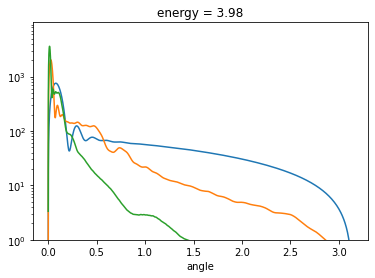

In [7]:
data_all.sel(energy=0.1).plot()
data_all.sel(energy=1.0).plot()
data_all.sel(energy=3.98).plot()
plt.yscale('log')
plt.ylim(1, None)

In [8]:
data_all

<xarray.DataArray (energy: 24, angle: 768)>
array([[1.2294e-01, 6.4774e-01, 1.5919e+00, ..., 2.5867e-03, 1.0525e-03,
        1.9976e-04],
       [9.8170e-01, 5.1725e+00, 1.2712e+01, ..., 5.2596e-04, 2.1401e-04,
        4.0618e-05],
       [1.2857e+00, 6.7743e+00, 1.6648e+01, ..., 4.2344e-04, 1.7230e-04,
        3.2701e-05],
       ...,
       [5.3459e-01, 2.8167e+00, 6.9223e+00, ..., 8.2957e-04, 3.3755e-04,
        6.4065e-05],
       [6.6829e-01, 3.5211e+00, 8.6536e+00, ..., 5.7271e-04, 2.3303e-04,
        4.4228e-05],
       [8.0880e-01, 4.2615e+00, 1.0473e+01, ..., 6.0053e-04, 2.4435e-04,
        4.6376e-05]])
Coordinates:
  * angle    (angle) float64 7.691e-06 4.052e-05 9.959e-05 ... 3.142 3.142 3.142
  * energy   (energy) float64 0.1 1.0 1.25 1.58 1.99 ... 0.398 0.501 0.631 0.794
Attributes:
    value:    $2\pi \sin\theta d\sigma / d\Omega$
    unit:     a.u.

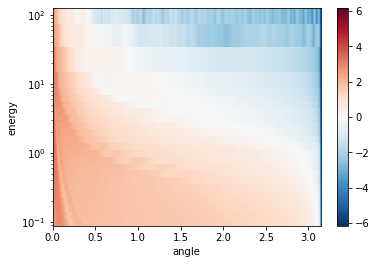

In [9]:
np.log10(data_all).sortby('energy').plot()
plt.yscale('log')

# Crosssections

In [10]:
filename = './elastic.txt'
with open(filename, 'r') as f:
    lines = f.readlines()

In [11]:
data_all = xr.Dataset({})

energy, sigma = [], []
for line in lines[31: 55]:
    items = [float(it) for it in line.split('\t')]
    energy.append(items[2])
    sigma.append(items[3])
data_all['total'] = xr.DataArray(sigma, dims=['energy'], coords={'energy': energy})
data_all['total'].attrs = {'unit': 'au'}

energy, sigma = [], []
for line in lines[62: 86]:
    items = [float(it) for it in line.split('\t')]
    energy.append(items[2])
    sigma.append(items[3])
data_all['momentum'] = xr.DataArray(sigma, dims=['energy'], coords={'energy': energy})
data_all['momentum'].attrs = {'unit': 'au'}

energy, sigma = [], []
for line in lines[93: 117]:
    items = [float(it) for it in line.split('\t')]
    energy.append(items[2])
    sigma.append(items[3])
data_all['viscosity'] = xr.DataArray(sigma, dims=['energy'], coords={'energy': energy})
data_all['viscosity'].attrs = {'unit': 'au'}

In [12]:
data_all.to_netcdf('elastic.nc')

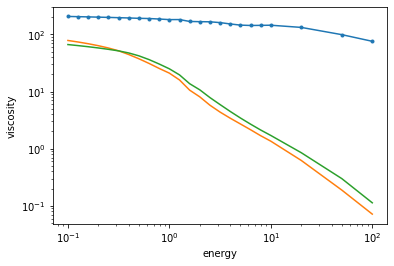

In [13]:
data_all['total'].plot(marker='.')
data_all['momentum'].plot()
data_all['viscosity'].plot()
plt.yscale('log')
plt.xscale('log')